In [2]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
from spyglass.common import Session, IntervalList, Electrode, get_electrode_indices, interval_list_contains, interval_list_intersect
from spyglass.lfp.v1 import LFPV1
# from spyglass.lfp_band.v1 import LFPBandV1
from spyglass.position import PositionOutput
from spyglass.position.v1 import TrodesPosV1
from tqdm import tqdm

import os
os.chdir('/home/sambray/Documents/MS_analysis_samsplaying/')
from ms_opto_stim_protocol import OptoStimProtocol,OptoStimProtocolParams, OptoStimProtocolTransfected, OptoStimProtocolLaser, OptoStimProtocolClosedLoop
from Analysis.utils import filter_animal, filter_task, filter_opto_data, violin_scatter, get_running_valid_intervals
from Analysis.lfp_analysis import get_ref_electrode_index, power_spectrum
from Analysis.position_analysis import filter_position_ports
from Style.style_guide import transfection_style, animal_style


os.chdir('/home/sambray/Documents/MS_analysis/')
from ms_task_performance import AlternationTaskPerformance
from ms_dio_event import DioEvents, ProcessedDioEvents

from ms_task_identification import TaskIdentification
from ms_interval import EpochIntervalListName

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# All trials, compare animals

In [82]:
# track_type = "early_wtrack"
track_type = "lineartrack"
animal = ""
results = {}

#################################
for animal in animal_style.index:
    if animal in ["control", "transfected"]:
        continue
    dataset_key = {
        # 'pulse_length_ms':40,
        # "transfected":True,
        "laser_power": 77,
        "targeted_phase": 90,
        "animal": animal,
        # "transfected": transfected,
        "min_pulse_length": 20,
        "track_type": track_type,
        # "interval_list_name":"pos 3 valid times",
    }
    dataset = filter_opto_data(dataset_key)
    if len(dataset) == 0:
        continue
    trial_velocities = []
    for nwb_file_name, interval_name in tqdm(
        zip(dataset.fetch("nwb_file_name"), dataset.fetch("interval_list_name"))
    ):
        if (
            nwb_file_name == "Bilbo20230802_.nwb"
            and interval_name == "pos 13 valid times"
        ):
            continue
        key = {
            "nwb_file_name": nwb_file_name,
            "interval_list_name": interval_name,
        }

        # speed
        pos_df = (
            TrodesPosV1() & key & {"trodes_pos_params_name": "single_led"}
        ).fetch1_dataframe()
        timestamps = np.array(pos_df.index)
        speed = np.asarray(pos_df.speed)

        # out of port times
        trial_intervals = np.array(filter_position_ports(key))
        trial_velocities.extend(
            [
                speed[
                    np.where((timestamps > interval[0]) & (timestamps < interval[1]))[0]
                ]
                for interval in trial_intervals
                if interval[1] - interval[0] > 0.8
            ]
        )

        name = animal
        results[name] = trial_velocities
        # Dio intervals


# trial_durations = np.array(trial_durations)
inbound_trial = np.array(inbound_trial)
opto_trial = np.array(opto_trial).astype(bool)
transfected_trial = np.array(transfected_trial).astype(bool)
accuracy = ~np.array(accuracy).astype(bool)

datasets: 2


1it [00:00,  2.75it/s]

linear_limits [10, 126.8923664781934]


2it [00:00,  2.79it/s]


linear_limits [10, 126.8923664781934]
datasets: 2


1it [00:00,  3.72it/s]

linear_limits [10, 123.30416347586447]


2it [00:00,  3.55it/s]


linear_limits [10, 123.30416347586447]
datasets: 2


1it [00:00,  2.76it/s]

linear_limits [10, 126.8923664781934]


2it [00:00,  2.79it/s]


linear_limits [10, 126.8923664781934]
datasets: 2


1it [00:00,  3.44it/s]

linear_limits [10, 126.8923664781934]


2it [00:00,  3.34it/s]


linear_limits [10, 126.8923664781934]
datasets: 3


1it [00:00,  3.33it/s]

linear_limits [10, 126.8923664781934]


2it [00:00,  3.86it/s]

linear_limits [10, 126.8923664781934]


3it [00:00,  3.64it/s]


linear_limits [10, 126.8923664781934]
datasets: 2


1it [00:00,  2.65it/s]

linear_limits [10, 126.8923664781934]


2it [00:00,  2.69it/s]


linear_limits [10, 126.8923664781934]
datasets: 2


1it [00:00,  2.60it/s]

linear_limits [10, 126.8923664781934]


2it [00:00,  2.69it/s]


linear_limits [10, 126.8923664781934]
datasets: 2


1it [00:00,  2.77it/s]

linear_limits [10, 126.8923664781934]


2it [00:00,  2.74it/s]


linear_limits [10, 126.8923664781934]
datasets: 1


1it [00:00,  2.65it/s]

linear_limits [10, 123.30416347586447]


168
126
218
193
233
169
137
138
54
               Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    Score     
No. Observations:      1436       Method:                REML      
No. Groups:            9          Scale:                 143.1269  
Min. group size:       54         Log-Likelihood:        -5613.5871
Max. group size:       233        Converged:             Yes       
Mean group size:       159.6                                       
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                53.514    3.307 16.184 0.000 47.033 59.995
Treatment[T.transfected]  8.999    4.423  2.034 0.042  0.330 17.668
Group Var                42.346    1.951                           



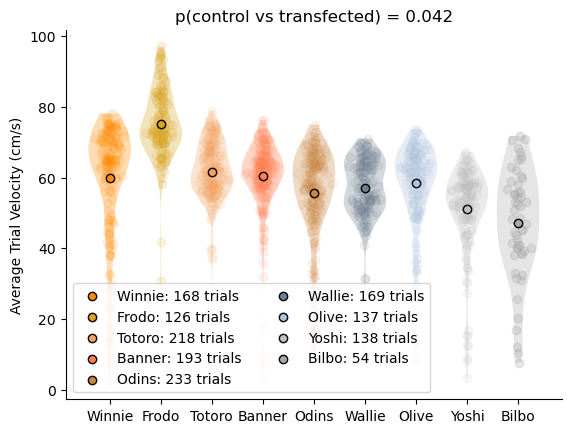

In [94]:
from Style.style_guide import animal_style

pos_list = []
fig = plt.figure()
ax = fig.gca()
all_dists = []
for i, (name, trial_velocities) in enumerate(results.items()):
    color = animal_style.loc[name, "color"]
    dist = [np.nanmean(v) for v in trial_velocities]
    # dist
    print(len(dist))
    trial_velocities
    pos = i * 0.6
    violin_scatter(
        dist,
        pos=[pos],
        color=color,
    )
    mid = np.mean(dist)
    plt.scatter(
        pos, mid, color=color, edgecolor="k", label=f"{name}: {len(dist)} trials"
    )
    pos_list.append(pos)
    all_dists.append(dist)

ax.spines[["top", "right"]].set_visible(False)
ax.set_xticks(pos_list, results.keys())
ax.set_ylabel("Average Trial Velocity (cm/s)")
plt.legend(
    ncol=2,
    loc=3,
)
from scipy.stats import ttest_ind

# stats
import statsmodels.api as sms
import pandas as pd

model_df = []
for i, animal in enumerate(results.keys()):
    data = [np.mean(d) for d in results[animal]]
    for d in data:
        model_df.append(
            {
                "Animal": animal,
                "Treatment": (
                    "transfected"
                    if animal_style.loc[animal, "background"] == "indianred"
                    else "control"
                ),
                "Score": d,
            }
        )


model_df = pd.DataFrame(model_df)

from statsmodels.formula.api import mixedlm

# Convert the 'Treatment' column to a categorical variable
model_df["Treatment"] = model_df["Treatment"].astype("category")

# Fit the mixed-effects model
model = mixedlm("Score ~ Treatment", model_df, groups=model_df["Animal"])
result = model.fit()

# Print the summary of the model
print(result.summary())
p_val_transfection = result.pvalues["Treatment[T.transfected]"]
plt.title(f"p(control vs transfected) = {np.round(p_val_transfection,3)}")
plt.rcParams["svg.fonttype"] = "none"
fig.savefig(
    "/home/sambray/Documents/MS_analysis_samsplaying/Figures_20241201/lineartrack velocities.svg"
)

# Control vs. stim trials within animals

In [ ]:
# track_type = "early_wtrack"
track_type = "lineartrack"
animal = ""
results = {}

#################################
for animal in animal_style.index:
    if animal not in ["control", "transfected"]:
        continue
    dataset_key = {
        # 'pulse_length_ms':40,
        # "transfected":True,
        "laser_power": 77,
        "targeted_phase": 90,
        "animal": animal,
        # "transfected": transfected,
        "min_pulse_length": 20,
        "track_type": track_type,
        # "interval_list_name":"pos 3 valid times",
    }
    dataset = filter_opto_data(dataset_key)
    if len(dataset) == 0:
        continue
    opto_velocities = []
    control_velocities = []
    for nwb_file_name, interval_name in tqdm(
        zip(dataset.fetch("nwb_file_name"), dataset.fetch("interval_list_name"))
    ):
        if (
            nwb_file_name == "Bilbo20230802_.nwb"
            and interval_name == "pos 13 valid times"
        ):
            continue
        key = {
            "nwb_file_name": nwb_file_name,
            "interval_list_name": interval_name,
        }

        # speed
        pos_df = (
            TrodesPosV1() & key & {"trodes_pos_params_name": "single_led"}
        ).fetch1_dataframe()
        timestamps = np.array(pos_df.index)
        speed = np.asarray(pos_df.speed)

        # out of port times
        opto_trials, control_trials = get_running_valid_intervals(key, filter_speed=0)
        opto_velocities.extend(
            [
                speed[
                    np.where((timestamps > interval[0]) & (timestamps < interval[1]))[0]
                ]
                for interval in opto_trials
                if interval[1] - interval[0] > 0.8
            ]
        )
        control_velocities.extend(
            [
                speed[
                    np.where((timestamps > interval[0]) & (timestamps < interval[1]))[0]
                ]
                for interval in control_trials
                if interval[1] - interval[0] > 0.8
            ]
        )

        name = animal
        results[name] = {"opto": opto_velocities, "control": control_velocities}
        # Dio intervals

datasets: 11


1it [00:00,  2.55it/s]

linear_limits [10, 126.8923664781934]


2it [00:00,  2.78it/s]

linear_limits [10, 126.8923664781934]


3it [00:01,  2.95it/s]

linear_limits [10, 123.30416347586447]


4it [00:01,  2.97it/s]

linear_limits [10, 123.30416347586447]


5it [00:01,  2.96it/s]

linear_limits [10, 126.8923664781934]


6it [00:02,  3.08it/s]

linear_limits [10, 126.8923664781934]


7it [00:02,  3.03it/s]

linear_limits [10, 126.8923664781934]


8it [00:02,  2.82it/s]

linear_limits [10, 126.8923664781934]


9it [00:03,  2.87it/s]

linear_limits [10, 126.8923664781934]


10it [00:03,  2.85it/s]

linear_limits [10, 126.8923664781934]


11it [00:03,  2.89it/s]


linear_limits [10, 126.8923664781934]
datasets: 7


1it [00:00,  2.12it/s]

linear_limits [10, 123.30416347586447]


2it [00:00,  2.28it/s]

linear_limits [10, 126.8923664781934]


3it [00:01,  2.37it/s]

linear_limits [10, 126.8923664781934]


4it [00:01,  2.41it/s]

linear_limits [10, 126.8923664781934]


5it [00:02,  2.43it/s]

linear_limits [10, 126.8923664781934]


6it [00:02,  2.44it/s]

linear_limits [10, 126.8923664781934]


7it [00:02,  2.40it/s]

linear_limits [10, 126.8923664781934]


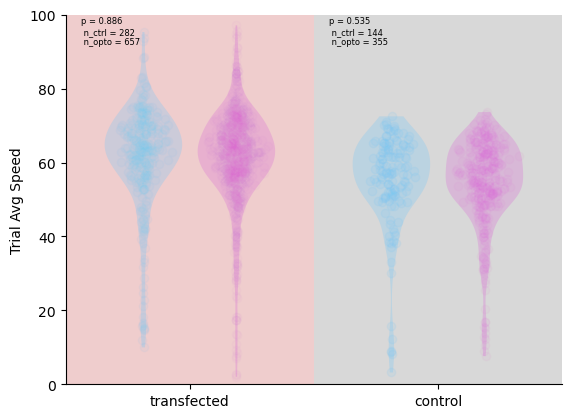

In [ ]:
from Style.style_guide import interval_style
from scipy.stats import ttest_ind

fig = plt.figure()
ax = fig.gca()
for i, (animal, vals) in enumerate(results.items()):
    control = [np.mean(d) for d in vals["control"]]
    opto = [np.mean(d) for d in vals["opto"]]
    violin_scatter(control, 1.6 * i - 0.3, color=interval_style["control"])
    violin_scatter(opto, 1.6 * i + 0.3, color=interval_style["test"])
    color = animal_style.loc[animal, "color"]

    plt.fill_between(
        [1.6 * i - 0.8, 1.6 * i + 0.8], 0, 100, facecolor=color, alpha=0.3, zorder=-1
    )
    p_val = ttest_ind(control, opto).pvalue
    p_val = np.round(
        p_val,
        3,
    )
    plt.text(
        i * 1.6 - 0.7,
        92,
        (
            f"p = {p_val}"
            + "\n n_ctrl = "
            + str(len(control))
            + "\n n_opto = "
            + str(len(opto))
        ),
        fontsize=6,
    )

    # ),fontsize=6)
ax.set_ylim(0, 100)
ax.set_xlim(-0.8, 1.6 * len(results) - 0.8)
ax.spines[["top", "right"]].set_visible(False)
ax.set_ylabel("Trial Avg Speed")
ax.set_xticks(np.arange(len(results)) * 1.6, results.keys())

plt.rcParams["svg.fonttype"] = "none"
# fig.savefig("/home/sambray/Documents/MS_analysis_samsplaying/Figures_20241201/velocities_lineartrack_intra_animal.svg")
# fig.savefig(
#     "/home/sambray/Documents/MS_analysis_samsplaying/Figures_20241201/velocities_lineartrack_intra_animal_pooled.svg"
# )